# Relevance Vector Machine - Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

from RVC import RVC

#from skrvm import RVC

## 1) Ripley's synthetic data

In [2]:
'''# Number of samples.
N = 50

mA = [ -0.5, 0.5]
sigmaA = 0.05
mB = [0.5, -0.5]
sigmaB = 0.05

classA = np.matrix([np.random.normal(mA[0], sigmaA, N), np.random.normal(mA[1], sigmaA, N)])
classB = np.matrix([np.random.normal(mB[0], sigmaB, N), np.random.normal(mB[1], sigmaB, N)])

# Generating matrixes
X = np.concatenate((classA, classB), axis=1).T

T = np.concatenate((np.ones(N), np.zeros(N)), axis=0)'''

data = np.loadtxt(open("datasets/ripley.csv", "rb"))
X = data[:, :2]
T = data[:, 2]

classA_indexes = np.argwhere(T == 0)
classB_indexes = np.argwhere(T == 1)

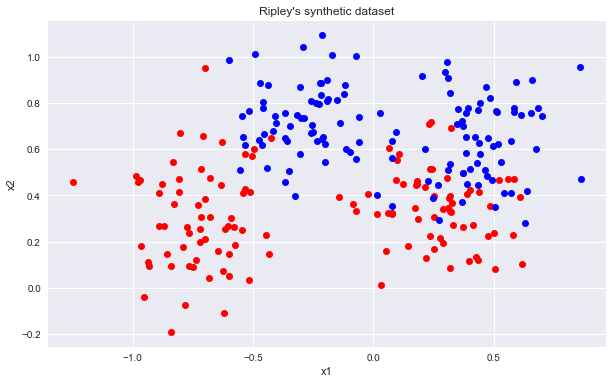

In [3]:
fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X[classA_indexes, 0], X[classA_indexes, 1], 'ro')
plt.plot(X[classB_indexes, 0], X[classB_indexes, 1], 'bo')
plt.title('Ripley\'s synthetic dataset')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [4]:
rvc = RVC(coef0=0.5)

rvc.fit(X,T)

relevance_vect = rvc.get_relevance_vectors()
print(" nb rel : ", relevance_vect.shape)
indexes_relev_vect = [i for i,x in enumerate(X) if x in relevance_vect]
pred = rvc.predict(X)
print(pred)

A Jupyter Widget


 nb rel :  (5, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1]


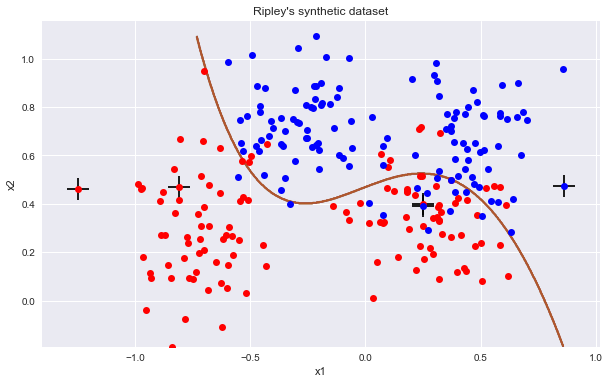

In [12]:
'''classA_pred = np.argwhere(pred == 0)
classB_pred = np.argwhere(pred == 1)'''

h = 0.002  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = rvc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X[classA_indexes, 0], X[classA_indexes, 1], 'ro')
plt.plot(X[classB_indexes, 0], X[classB_indexes, 1], 'bo')
plt.scatter(relevance_vect[:,0], relevance_vect[:,1], c='black', marker='+', s=500)
#plt.plot(relevance_vect[:,0], relevance_vect[:,1], 'go')
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.title('Ripley\'s synthetic dataset')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()